In [128]:
import cartopy
import matplotlib.pyplot as mp
import matplotlib.cm as mcm

import numpy
import pandas
import xarray
import cmocean
import scipy.stats
import netCDF4

mp.rcParams.update({'mathtext.default': 'regular'})

In [2]:
ds1 = xarray.open_dataset('/beegfs/DATA/pritchard/blangenb/GRACE_DATA/GRCTellus.CSR.200204_201701.LND.RL05.DSTvSCS1409.nc', decode_times=False)

ds1_time = ds1['time']
ds1_time_values = ds1_time.values
ds1_datetime = netCDF4.num2date(ds1_time.values, units=ds1_time.units, calendar='standard')
#ds1_days = netCDF4.date2num(ds1_datetime, units='days since 2002-01-01', calendar='standard')

ds1_lon = ds1['lon'].values
ds1_lat = ds1['lat'].values

ds1_lwe = ds1['lwe_thickness'].values

ds1_lwe_timemean = numpy.mean(ds1_lwe, axis=0)
ds1_lwe_trend = numpy.zeros((ds1_lwe_timemean.shape))*numpy.nan
ds1_lwe_trend_pvals = numpy.zeros((ds1_lwe_timemean.shape))*numpy.nan

for i in range(ds1_lwe_trend.shape[0]):
    for j in range(ds1_lwe_trend.shape[1]):
        ds1_lwe_trend[i,j], c,r,ds1_lwe_trend_pvals[i,j],p = scipy.stats.linregress(ds1_time_values, ds1_lwe[:,i,j])

ds1_lon_pcolormesh = numpy.zeros(ds1_lon.size+2)
ds1_lon_pcolormesh[1:-1] = ds1_lon
ds1_lon_pcolormesh[0] = ds1_lon[0]-numpy.diff(ds1_lon)[0]
ds1_lon_pcolormesh[-1] = ds1_lon[-1]+numpy.diff(ds1_lon)[-1]

ds1_lon_pcolormesh_midpoints = ds1_lon_pcolormesh[:-1]+0.5*(numpy.diff(ds1_lon_pcolormesh))

ds1_lat_pcolormesh = numpy.zeros(ds1_lat.size+2)
ds1_lat_pcolormesh[1:-1] = ds1_lat
ds1_lat_pcolormesh[0] = ds1_lat[0]-numpy.diff(ds1_lat)[0]
ds1_lat_pcolormesh[-1] = ds1_lat[-1]+numpy.diff(ds1_lat)[-1]

ds1_lat_pcolormesh_midpoints = ds1_lat_pcolormesh[:-1]+0.5*(numpy.diff(ds1_lat_pcolormesh))

nyears = (ds1_time_values[-1]-ds1_time_values[0])/365.25

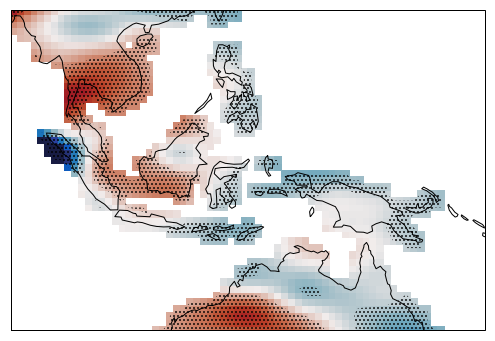

In [3]:
map_proj = cartopy.crs.PlateCarree(central_longitude=180)
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8.5,6))
ax = fig.add_subplot(111, projection=map_proj)

ax.pcolormesh(ds1_lon_pcolormesh_midpoints, \
              ds1_lat_pcolormesh_midpoints, \
              ds1_lwe_trend*nyears, \
              cmap=cmocean.cm.balance_r, \
              vmin=-.05, vmax=.05, \
              transform=data_proj)

ax.contourf(ds1_lon, \
           ds1_lat, \
           ds1_lwe_trend_pvals, \
           hatches=['...'], \
           levels=[0,.05], \
           cmap=cmocean.cm.balance_r, \
           transform=data_proj, \
           alpha=0)

ax.coastlines()
ax.set_extent([90,160,-20,20])

In [4]:
ds2 = xarray.open_dataset('/beegfs/DATA/pritchard/blangenb/GRACE_DATA/GRCTellus.GFZ.200204_201701.LND.RL05.DSTvSCS1409.nc', decode_times=False)

ds2_time = ds2['time']
ds2_time_values = ds2_time.values
ds2_datetime = netCDF4.num2date(ds2_time.values, units=ds2_time.units, calendar='standard')
#ds2_days = netCDF4.date2num(ds2_datetime, units='days since 2002-01-01', calendar='standard')

ds2_lon = ds2['lon'].values
ds2_lat = ds2['lat'].values

ds2_lwe = ds2['lwe_thickness'].values

ds2_lwe_timemean = numpy.mean(ds2_lwe, axis=0)
ds2_lwe_trend = numpy.zeros((ds2_lwe_timemean.shape))*numpy.nan
ds2_lwe_trend_pvals = numpy.zeros((ds2_lwe_timemean.shape))*numpy.nan

for i in range(ds2_lwe_trend.shape[0]):
    for j in range(ds2_lwe_trend.shape[1]):
        ds2_lwe_trend[i,j], c,r,ds2_lwe_trend_pvals[i,j],p = scipy.stats.linregress(ds2_time_values, ds2_lwe[:,i,j])


ds2_lon_pcolormesh = numpy.zeros(ds2_lon.size+2)
ds2_lon_pcolormesh[1:-1] = ds2_lon
ds2_lon_pcolormesh[0] = ds2_lon[0]-numpy.diff(ds2_lon)[0]
ds2_lon_pcolormesh[-1] = ds2_lon[-1]+numpy.diff(ds2_lon)[-1]

ds2_lon_pcolormesh_midpoints = ds2_lon_pcolormesh[:-1]+0.5*(numpy.diff(ds2_lon_pcolormesh))

ds2_lat_pcolormesh = numpy.zeros(ds2_lat.size+2)
ds2_lat_pcolormesh[1:-1] = ds2_lat
ds2_lat_pcolormesh[0] = ds2_lat[0]-numpy.diff(ds2_lat)[0]
ds2_lat_pcolormesh[-1] = ds2_lat[-1]+numpy.diff(ds2_lat)[-1]

ds2_lat_pcolormesh_midpoints = ds2_lat_pcolormesh[:-1]+0.5*(numpy.diff(ds2_lat_pcolormesh))

nyears = (ds2_time_values[-1]-ds2_time_values[0])/365.25

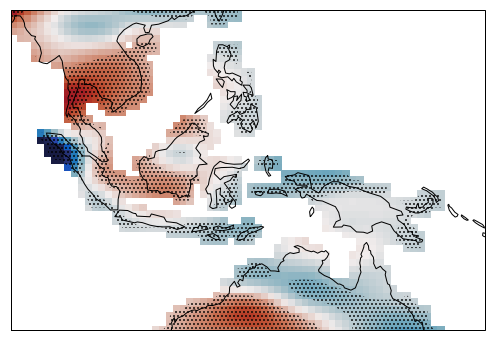

In [5]:
map_proj = cartopy.crs.PlateCarree(central_longitude=180)
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8.5,6))
ax = fig.add_subplot(111, projection=map_proj)

ax.pcolormesh(ds2_lon_pcolormesh_midpoints, \
              ds2_lat_pcolormesh_midpoints, \
              ds2_lwe_trend*nyears, \
              cmap=cmocean.cm.balance_r, \
              vmin=-.05, vmax=.05, \
              transform=data_proj)

ax.contourf(ds2_lon, \
           ds2_lat, \
           ds2_lwe_trend_pvals, \
           hatches=['...'], \
           levels=[0,.05], \
           cmap=cmocean.cm.balance_r, \
           transform=data_proj, \
           alpha=0)

ax.coastlines()
ax.set_extent([90,160,-20,20])

In [6]:
ds3 = xarray.open_dataset('/beegfs/DATA/pritchard/blangenb/GRACE_DATA/GRCTellus.JPL.200204_201701.LND.RL05_1.DSTvSCS1411.nc', decode_times=False)

ds3_time = ds3['time']
ds3_time_values = ds3_time.values
ds3_datetime = netCDF4.num2date(ds3_time.values, units=ds3_time.units, calendar='standard')
#ds3_days = netCDF4.date2num(ds3_datetime, units='days since 2002-01-01', calendar='standard')

ds3_lon = ds3['lon'].values
ds3_lat = ds3['lat'].values

ds3_lwe = ds3['lwe_thickness'].values

ds3_lwe_timemean = numpy.mean(ds3_lwe, axis=0)
ds3_lwe_trend = numpy.zeros((ds3_lwe_timemean.shape))*numpy.nan
ds3_lwe_trend_pvals = numpy.zeros((ds3_lwe_timemean.shape))*numpy.nan

for i in range(ds3_lwe_trend.shape[0]):
    for j in range(ds3_lwe_trend.shape[1]):
        ds3_lwe_trend[i,j], c,r,ds3_lwe_trend_pvals[i,j],p = scipy.stats.linregress(ds3_time_values, ds3_lwe[:,i,j])

ds3_lon_pcolormesh = numpy.zeros(ds3_lon.size+2)
ds3_lon_pcolormesh[1:-1] = ds3_lon
ds3_lon_pcolormesh[0] = ds3_lon[0]-numpy.diff(ds3_lon)[0]
ds3_lon_pcolormesh[-1] = ds3_lon[-1]+numpy.diff(ds3_lon)[-1]

ds3_lon_pcolormesh_midpoints = ds3_lon_pcolormesh[:-1]+0.5*(numpy.diff(ds3_lon_pcolormesh))

ds3_lat_pcolormesh = numpy.zeros(ds3_lat.size+2)
ds3_lat_pcolormesh[1:-1] = ds3_lat
ds3_lat_pcolormesh[0] = ds3_lat[0]-numpy.diff(ds3_lat)[0]
ds3_lat_pcolormesh[-1] = ds3_lat[-1]+numpy.diff(ds3_lat)[-1]

ds3_lat_pcolormesh_midpoints = ds3_lat_pcolormesh[:-1]+0.5*(numpy.diff(ds3_lat_pcolormesh))

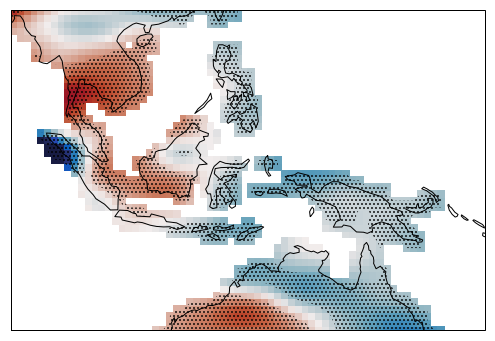

In [7]:
map_proj = cartopy.crs.PlateCarree(central_longitude=180)
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8.5,6))
ax = fig.add_subplot(111, projection=map_proj)

ax.pcolormesh(ds3_lon_pcolormesh_midpoints, \
              ds3_lat_pcolormesh_midpoints, \
              ds3_lwe_trend*nyears, \
              cmap=cmocean.cm.balance_r, \
              vmin=-.05, vmax=.05, \
              transform=data_proj)

ax.contourf(ds3_lon, \
           ds3_lat, \
           ds3_lwe_trend_pvals, \
           hatches=['...'], \
           levels=[0,.05], \
           cmap=cmocean.cm.balance_r, \
           transform=data_proj, \
           alpha=0)

ax.coastlines()
ax.set_extent([90,160,-20,20])

# all 3 figures together

In [8]:
nyears1 = (ds1_time_values[-1]-ds1_time_values[0])/365.25
nyears1 = (ds1_time_values[-1]-ds1_time_values[0])/365.25
nyears1 = (ds1_time_values[-1]-ds1_time_values[0])/365.25

In [9]:
nyears

14.76249144421629

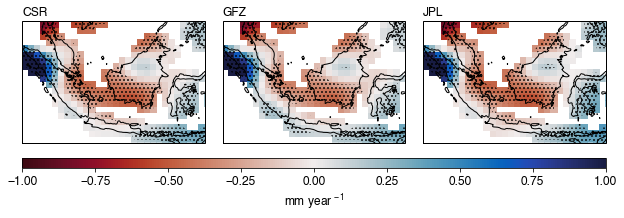

In [10]:
fontsize=12

vmin_val = -1
vmax_val = 1

map_proj = cartopy.crs.PlateCarree(central_longitude=180)
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8.5,2))

ax1 = fig.add_subplot(131, projection=map_proj)
c1 = ax1.pcolormesh(ds1_lon_pcolormesh_midpoints, \
              ds1_lat_pcolormesh_midpoints, \
              ds1_lwe_trend*365.25, \
              cmap=cmocean.cm.balance_r, \
              vmin=vmin_val, vmax=vmax_val, \
              transform=data_proj)
ax1.contourf(ds1_lon, \
           ds1_lat, \
           ds1_lwe_trend_pvals, \
           hatches=['...'], \
           levels=[0,.05], \
           transform=data_proj, \
           alpha=0)

ax2 = fig.add_subplot(132, projection=map_proj)
c2 = ax2.pcolormesh(ds2_lon_pcolormesh_midpoints, \
              ds2_lat_pcolormesh_midpoints, \
              ds2_lwe_trend*365.25, \
              cmap=cmocean.cm.balance_r, \
              vmin=vmin_val, vmax=vmax_val, \
              transform=data_proj)
ax2.contourf(ds2_lon, \
           ds2_lat, \
           ds2_lwe_trend_pvals, \
           hatches=['...'], \
           levels=[0,.05], \
           transform=data_proj, \
           alpha=0)

ax3 = fig.add_subplot(133, projection=map_proj)
c3 = ax3.pcolormesh(ds3_lon_pcolormesh_midpoints, \
              ds3_lat_pcolormesh_midpoints, \
              ds3_lwe_trend*365.25, \
              cmap=cmocean.cm.balance_r, \
              vmin=vmin_val, vmax=vmax_val, \
              transform=data_proj)
ax3.contourf(ds3_lon, \
           ds3_lat, \
           ds3_lwe_trend_pvals, \
           hatches=['...'], \
           levels=[0,.05], \
           transform=data_proj, \
           alpha=0)

ax1.coastlines(resolution='50m')
ax2.coastlines(resolution='50m')
ax3.coastlines(resolution='50m')

ax1.set_extent([95,125,-10,10])
ax2.set_extent([95,125,-10,10])
ax3.set_extent([95,125,-10,10])

ax1.text(s='CSR', x=0, y=1.02, ha='left', va='bottom', transform=ax1.transAxes, fontsize=fontsize)
ax1.text(s='GFZ', x=0, y=1.02, ha='left', va='bottom', transform=ax2.transAxes, fontsize=fontsize)
ax1.text(s='JPL', x=0, y=1.02, ha='left', va='bottom', transform=ax3.transAxes, fontsize=fontsize)

fig.tight_layout()

ax1pos = ax1.get_position()
ax3pos = ax3.get_position()

cbar_ax = fig.add_axes([ax1pos.x0,ax1pos.y0-0.175,ax3pos.x1-ax1pos.x0,0.07])
cbar = mp.colorbar(c1, cax=cbar_ax, orientation='horizontal')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('mm year$^{\,-1}$', fontsize=fontsize)

fig.savefig('../figures/GRACE_anomalies_2002-2017.png', dpi=300, bbox_inches='tight', transparent=True)

Plot time series of the area that passes 95% confidence  
First pick out the correct lat/lon extent:

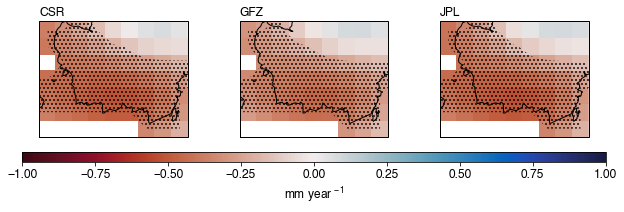

In [20]:
fontsize=12

vmin_val = -1
vmax_val = 1

map_proj = cartopy.crs.PlateCarree(central_longitude=180)
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8.5,2))

ax1 = fig.add_subplot(131, projection=map_proj)
c1 = ax1.pcolormesh(ds1_lon_pcolormesh_midpoints, \
              ds1_lat_pcolormesh_midpoints, \
              ds1_lwe_trend*365.25, \
              cmap=cmocean.cm.balance_r, \
              vmin=vmin_val, vmax=vmax_val, \
              transform=data_proj)
ax1.contourf(ds1_lon, \
           ds1_lat, \
           ds1_lwe_trend_pvals, \
           hatches=['...'], \
           levels=[0,.05], \
           transform=data_proj, \
           alpha=0)

ax2 = fig.add_subplot(132, projection=map_proj)
c2 = ax2.pcolormesh(ds2_lon_pcolormesh_midpoints, \
              ds2_lat_pcolormesh_midpoints, \
              ds2_lwe_trend*365.25, \
              cmap=cmocean.cm.balance_r, \
              vmin=vmin_val, vmax=vmax_val, \
              transform=data_proj)
ax2.contourf(ds2_lon, \
           ds2_lat, \
           ds2_lwe_trend_pvals, \
           hatches=['...'], \
           levels=[0,.05], \
           transform=data_proj, \
           alpha=0)

ax3 = fig.add_subplot(133, projection=map_proj)
c3 = ax3.pcolormesh(ds3_lon_pcolormesh_midpoints, \
              ds3_lat_pcolormesh_midpoints, \
              ds3_lwe_trend*365.25, \
              cmap=cmocean.cm.balance_r, \
              vmin=vmin_val, vmax=vmax_val, \
              transform=data_proj)
ax3.contourf(ds3_lon, \
           ds3_lat, \
           ds3_lwe_trend_pvals, \
           hatches=['...'], \
           levels=[0,.05], \
           transform=data_proj, \
           alpha=0)

ax1.coastlines(resolution='50m')
ax2.coastlines(resolution='50m')
ax3.coastlines(resolution='50m')

ax1.set_extent([108,117,-5,2])
ax2.set_extent([108,117,-5,2])
ax3.set_extent([108,117,-5,2])

ax1.text(s='CSR', x=0, y=1.02, ha='left', va='bottom', transform=ax1.transAxes, fontsize=fontsize)
ax1.text(s='GFZ', x=0, y=1.02, ha='left', va='bottom', transform=ax2.transAxes, fontsize=fontsize)
ax1.text(s='JPL', x=0, y=1.02, ha='left', va='bottom', transform=ax3.transAxes, fontsize=fontsize)

fig.tight_layout()

ax1pos = ax1.get_position()
ax3pos = ax3.get_position()

cbar_ax = fig.add_axes([ax1pos.x0,ax1pos.y0-0.175,ax3pos.x1-ax1pos.x0,0.07])
cbar = mp.colorbar(c1, cax=cbar_ax, orientation='horizontal')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('mm year$^{\,-1}$', fontsize=fontsize)

In [39]:
lon_lo = 108
lon_hi = 117
lat_lo = -5
lat_hi = 2

where is it significant

In [121]:
lon_mesh, lat_mesh = numpy.meshgrid(ds1_lon,ds1_lat)

In [117]:
ds1_signif = numpy.copy(ds1_lwe_trend_pvals)
ds1_signif[ds1_lwe_trend_pvals<=0.05]=1
ds1_signif[ds1_lwe_trend_pvals>0.05]=numpy.nan

ds1_signif_region = numpy.copy(ds1_signif)*numpy.nan
ds1_signif_region[(lat_mesh>=lat_lo)&(lat_mesh<=lat_hi)&(lon_mesh>=lon_lo)&(lon_mesh<=lon_hi)]=1.0
ds1_signif_region = ds1_signif_region*ds1_signif

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [122]:
ds2_signif = numpy.copy(ds2_lwe_trend_pvals)
ds2_signif[ds2_lwe_trend_pvals<=0.05]=1
ds2_signif[ds2_lwe_trend_pvals>0.05]=numpy.nan

ds2_signif_region = numpy.copy(ds2_signif)*numpy.nan
ds2_signif_region[(lat_mesh>=lat_lo)&(lat_mesh<=lat_hi)&(lon_mesh>=lon_lo)&(lon_mesh<=lon_hi)]=1.0
ds2_signif_region = ds2_signif_region*ds2_signif

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
ds3_signif = numpy.copy(ds3_lwe_trend_pvals)
ds3_signif[ds3_lwe_trend_pvals<=0.05]=1
ds3_signif[ds3_lwe_trend_pvals>0.05]=numpy.nan

ds3_signif_region = numpy.copy(ds3_signif)*numpy.nan
ds3_signif_region[(lat_mesh>=lat_lo)&(lat_mesh<=lat_hi)&(lon_mesh>=lon_lo)&(lon_mesh<=lon_hi)]=1.0
ds3_signif_region = ds3_signif_region*ds3_signif

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
ds1_lwe_region_mean = numpy.nanmean(ds1_lwe*ds1_signif_region, axis=(1,2))
ds2_lwe_region_mean = numpy.nanmean(ds2_lwe*ds2_signif_region, axis=(1,2))
ds3_lwe_region_mean = numpy.nanmean(ds3_lwe*ds3_signif_region, axis=(1,2))

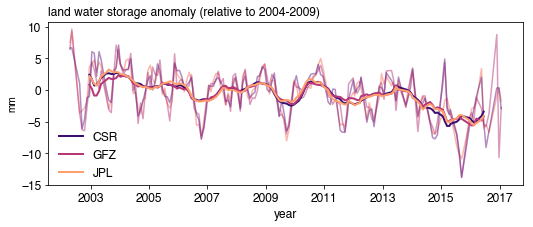

In [171]:
fontsize=12

fig, ax = mp.subplots(1,1)
fig.set_size_inches(8.5,3)

mp.plot(ds1_datetime, ds1_lwe_region_mean, color=mcm.magma(0.7), alpha=0.5)
mp.plot(ds1_datetime, ds2_lwe_region_mean, color=mcm.magma(0.5), alpha=0.5)
mp.plot(ds1_datetime, ds3_lwe_region_mean, color=mcm.magma(0.3), alpha=0.5)

mp.plot(ds1_datetime, pandas.Series(ds1_lwe_region_mean).rolling(12, center=True).mean(), color=mcm.magma(0.2), lw=2, label='CSR')
mp.plot(ds1_datetime, pandas.Series(ds2_lwe_region_mean).rolling(12, center=True).mean(), color=mcm.magma(0.5), lw=2, label='GFZ')
mp.plot(ds1_datetime, pandas.Series(ds3_lwe_region_mean).rolling(12, center=True).mean(), color=mcm.magma(0.8), lw=2, label='JPL')

ax.set_xlabel('year', fontsize=fontsize)
ax.set_ylabel('mm')
ax.text(s='land water storage anomaly (relative to 2004-2009)',\
        x=0, y=1.02, \
        fontsize=fontsize, ha='left', va='bottom', transform=ax.transAxes)
ax.tick_params(labelsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fancybox=False, fontsize=fontsize, \
          edgecolor='None', facecolor='None', \
          loc='lower left', bbox_to_anchor=(0.01,0), borderpad=0)

fig.savefig('../figures/GRACE_anomalies_kalimantan_mean_2004-2017.pdf', bbox_inches='tight', transparent=True)